In [52]:
%config IPCompleter.greedy=True

In [53]:
import pandas as pd
import numpy as np
import math
import datetime
from Tools import *

In [54]:
def format_time(dfTime):
    x=[]
    for i in dfTime:
        i=str(i)
        new_i=""
        count=1
        for j in i:
            if count%2==0 and count!=len(i):
                new_i+=j
                new_i+=":"
            else:
                new_i+=j
            count+=1
        x.append(new_i)
    xy=pd.Series(x)
    return xy

In [55]:
def add_minute(df):
    from datetime import date
    from dateutil.relativedelta import relativedelta
    
    c=pd.to_datetime(df)
    after6M=c+relativedelta(minutes=+6)
    befor6M=c+relativedelta(minutes=-6)
    return after6M,befor6M


In [56]:
def add_minute2(df):
    from datetime import date
    from dateutil.relativedelta import relativedelta
    minutes=[]

    c=pd.to_datetime(df)
    after6M=c+relativedelta(minutes=+6)
    #befor6M=c+relativedelta(minutes=-6)
    #minutes.append([after6M,befor6M,i])
    return after6M

### Fiyatlar okunuyor. Geçici "df" e yazılıyor.

In [57]:
df=pd.read_csv("tsla.us.txt",sep=",",names=['TICKER','PER','DATE','TIME','OPEN','HIGH','LOW','CLOSE','VOL','OPENINT'])

Gereksiz kolonlar siliniyor. Date kolonu formatlanıyor

In [58]:
df=df.drop(["PER","TICKER"],axis='columns')
df["DATE2"]=pd.to_datetime(df["DATE"],format="%Y%m%d")
df["DATE2"]=df["DATE2"].apply(lambda x: datetime.datetime.strftime(x, "%d/%m/%Y"))
df["TIME2"]=format_time(df["TIME"])
#df["ID"]=[i for i in range(0,len(df))]
df.insert(0,"ID",range(0,len(df)))

In [59]:
df.tail()

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00
2729,2729,20201019,215500,432.60,432.85,430.410,430.830,1028440,0,19/10/2020,21:55:00


Günlük fiyat değişimleri hesaplanıyor

In [60]:
df["DIFF"]=df["CLOSE"]-df["OPEN"]
df.loc[df['DIFF'] < 0, 'STATUS'] = -1
df.loc[df['DIFF'] > 0, 'STATUS'] = 1
df.loc[df['DIFF'] == 0, 'STATUS'] = 0 ## TO-DO: Bir tolerans aralığındaki değerleri 0 olarak işaretlenmesi yapıladak.
df["DIFF_PERC"]=(df["DIFF"]*100)/df["OPEN"]
df

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2,DIFF,STATUS,DIFF_PERC
0,0,20200831,153000,444.61,450.49,440.110,447.029,1766358,0,31/08/2020,15:30:00,2.419,1.0,0.544072
1,1,20200831,153500,447.04,447.80,441.210,442.160,661342,0,31/08/2020,15:35:00,-4.880,-1.0,-1.091625
2,2,20200831,154000,442.08,452.28,440.710,452.149,722964,0,31/08/2020,15:40:00,10.069,1.0,2.277642
3,3,20200831,154500,451.84,459.53,450.050,459.408,1570773,0,31/08/2020,15:45:00,7.568,1.0,1.674929
4,4,20200831,155000,459.20,461.00,455.500,456.410,1346307,0,31/08/2020,15:50:00,-2.790,-1.0,-0.607578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00,1.055,1.0,0.244309
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00,-0.880,-1.0,-0.203299
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00,1.950,1.0,0.451389
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00,-1.350,-1.0,-0.311096


Zaman kolunu formatlanıyor. DATETIME kolonu oluşturuluyor

In [61]:
df["DATETIME"]=df["DATE2"]+" "+df["TIME2"]
df["DATETIME"]=pd.to_datetime(df["DATETIME"])
df["DATETIME"]=df["DATETIME"].apply(lambda x: datetime.datetime.strftime(x, "%d/%m/%Y %H:%M:%S"))
df["DATETIME"]=pd.to_datetime(df["DATETIME"])
df

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2,DIFF,STATUS,DIFF_PERC,DATETIME
0,0,20200831,153000,444.61,450.49,440.110,447.029,1766358,0,31/08/2020,15:30:00,2.419,1.0,0.544072,2020-08-31 15:30:00
1,1,20200831,153500,447.04,447.80,441.210,442.160,661342,0,31/08/2020,15:35:00,-4.880,-1.0,-1.091625,2020-08-31 15:35:00
2,2,20200831,154000,442.08,452.28,440.710,452.149,722964,0,31/08/2020,15:40:00,10.069,1.0,2.277642,2020-08-31 15:40:00
3,3,20200831,154500,451.84,459.53,450.050,459.408,1570773,0,31/08/2020,15:45:00,7.568,1.0,1.674929,2020-08-31 15:45:00
4,4,20200831,155000,459.20,461.00,455.500,456.410,1346307,0,31/08/2020,15:50:00,-2.790,-1.0,-0.607578,2020-08-31 15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00,1.055,1.0,0.244309,2020-10-19 21:35:00
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00,-0.880,-1.0,-0.203299,2020-10-19 21:40:00
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00,1.950,1.0,0.451389,2020-10-19 21:45:00
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00,-1.350,-1.0,-0.311096,2020-10-19 21:50:00


<font color=aqua >Fiyatlar son haliyle "df_s" e yazılıyor. <b>Header ekleniyor</b></font>

In [62]:
df_s=df.loc[:,["ID","OPEN","HIGH","LOW","CLOSE","STATUS","DIFF_PERC","DATETIME"]]

#### 0 a yakın değerler bulunup tolerans tespit ediliyor.

[  2.   1.   0.   1.   1.   1.   2.   6.  15.  12.  33.  59. 150. 453.
 922. 635. 250.  92.  50.  14.   8.   7.   9.   3.   1.   0.   1.   1.
   0.   1.]
[-4.34388049 -4.04847583 -3.75307118 -3.45766652 -3.16226186 -2.8668572
 -2.57145255 -2.27604789 -1.98064323 -1.68523857 -1.38983392 -1.09442926
 -0.7990246  -0.50361995 -0.20821529  0.08718937  0.38259403  0.67799868
  0.97340334  1.268808    1.56421266  1.85961731  2.15502197  2.45042663
  2.74583128  3.04123594  3.3366406   3.63204526  3.92744991  4.22285457
  4.51825923]
<a list of 30 Patch objects>


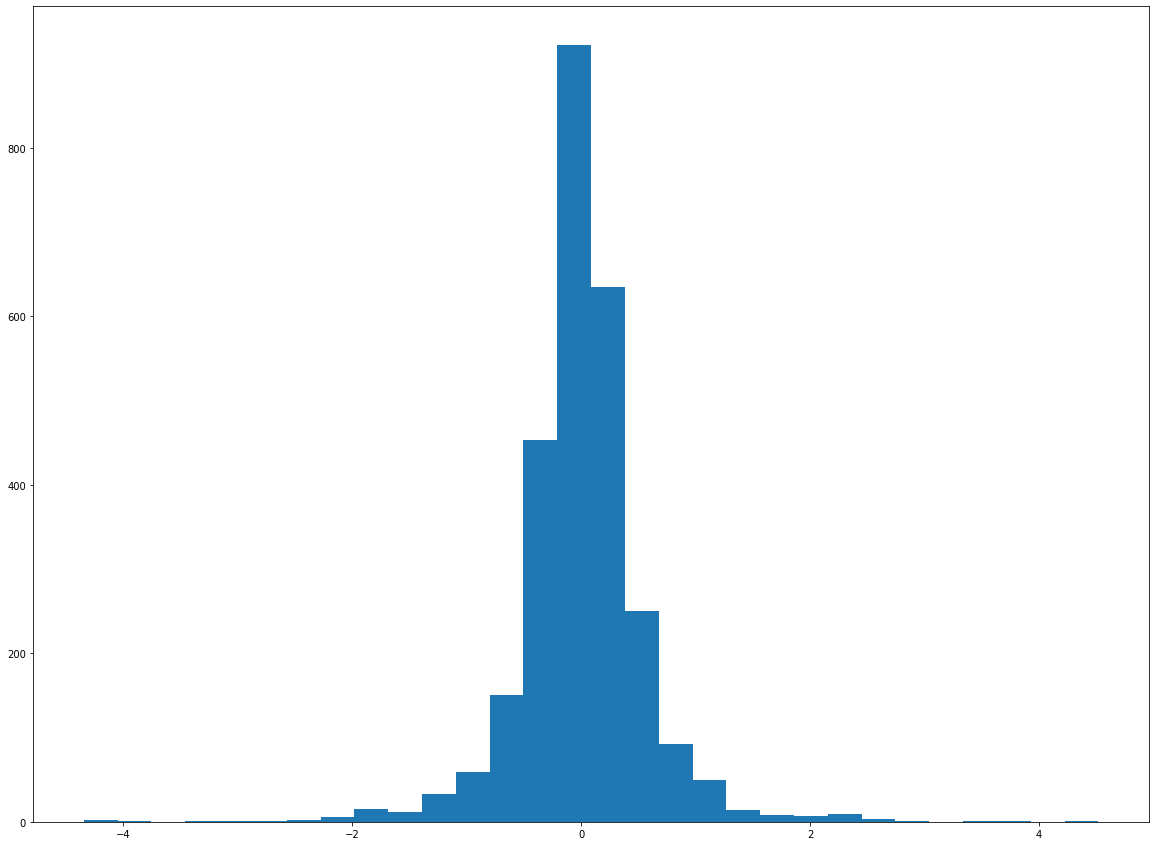

In [63]:
import matplotlib.pyplot as plt
#df_s["DIFF_PERC"].hist(bins=50)
plt.figure(figsize=(20,15))
counts, bins, bars = plt.hist(df_s["DIFF_PERC"],bins=30)
print(counts)
print(bins)
print(bars)
## -0.20821529  0.08718937 bu aralığı "0" sayacağız

### Fiyatların olduğu zaman aralığındaki haberler alınıyor.


In [64]:

print(df_s.head())

print("Index Name: ",df_s.index.name)
start_date="2020-08-31 15:30:00"
end_date="2020-08-31 15:50:00"
mask = (df_s['DATETIME'] > start_date) & (df_s['DATETIME'] <= end_date)
df_s.loc[mask]
print(df_s.head())
print(df_s.columns)
print(df_s.shape)

   ID    OPEN    HIGH     LOW    CLOSE  STATUS  DIFF_PERC            DATETIME
0   0  444.61  450.49  440.11  447.029     1.0   0.544072 2020-08-31 15:30:00
1   1  447.04  447.80  441.21  442.160    -1.0  -1.091625 2020-08-31 15:35:00
2   2  442.08  452.28  440.71  452.149     1.0   2.277642 2020-08-31 15:40:00
3   3  451.84  459.53  450.05  459.408     1.0   1.674929 2020-08-31 15:45:00
4   4  459.20  461.00  455.50  456.410    -1.0  -0.607578 2020-08-31 15:50:00
Index Name:  None
   ID    OPEN    HIGH     LOW    CLOSE  STATUS  DIFF_PERC            DATETIME
0   0  444.61  450.49  440.11  447.029     1.0   0.544072 2020-08-31 15:30:00
1   1  447.04  447.80  441.21  442.160    -1.0  -1.091625 2020-08-31 15:35:00
2   2  442.08  452.28  440.71  452.149     1.0   2.277642 2020-08-31 15:40:00
3   3  451.84  459.53  450.05  459.408     1.0   1.674929 2020-08-31 15:45:00
4   4  459.20  461.00  455.50  456.410    -1.0  -0.607578 2020-08-31 15:50:00
Index(['ID', 'OPEN', 'HIGH', 'LOW', 'CLOSE', '

In [65]:
print(df_s)
#Aşağıdaki commentli değerler kullanılacak
#margin_neg=-0.20821529
#margin_pos=0.08718937

margin_neg=-0.00821529
margin_pos=0.00718937

mask2 = (df_s['DIFF_PERC'] > margin_neg) & (df_s['DIFF_PERC'] <= margin_pos)
df_s.loc[mask2,"DIFF_PERC"]=0
df_s.loc[mask2,"STATUS"]=0
df_s["DIFF_PERC"].value_counts(sort=True)



        ID    OPEN    HIGH      LOW    CLOSE  STATUS  DIFF_PERC  \
0        0  444.61  450.49  440.110  447.029     1.0   0.544072   
1        1  447.04  447.80  441.210  442.160    -1.0  -1.091625   
2        2  442.08  452.28  440.710  452.149     1.0   2.277642   
3        3  451.84  459.53  450.050  459.408     1.0   1.674929   
4        4  459.20  461.00  455.500  456.410    -1.0  -0.607578   
...    ...     ...     ...      ...      ...     ...        ...   
2725  2725  431.83  433.04  431.700  432.885     1.0   0.244309   
2726  2726  432.86  432.90  431.610  431.980    -1.0  -0.203299   
2727  2727  432.00  433.95  431.955  433.950     1.0   0.451389   
2728  2728  433.95  434.12  432.240  432.600    -1.0  -0.311096   
2729  2729  432.60  432.85  430.410  430.830    -1.0  -0.409154   

                DATETIME  
0    2020-08-31 15:30:00  
1    2020-08-31 15:35:00  
2    2020-08-31 15:40:00  
3    2020-08-31 15:45:00  
4    2020-08-31 15:50:00  
...                  ...  
2725 2

 0.000000    50
-0.041436     1
-0.468416     1
-0.169503     1
 0.741910     1
             ..
 0.050261     1
 0.378900     1
 0.045746     1
 0.107498     1
-0.016662     1
Name: DIFF_PERC, Length: 2681, dtype: int64

### Tarih aralığındaki fiyatları getiren fonksiyon

In [66]:
def get_prices(start_date,end_date,df):
    mask = (df['DATETIME'] > start_date) & (df['DATETIME'] <= end_date)
    df_x=df.loc[mask]
    return df_x

## Haberler çekiliyor.

In [67]:
df_news=pd.read_csv("TeslaNews.csv")
df_news2=pd.read_csv("TeslaNews_November.csv")

#Gereksiz kolonlar silindi
df_news.drop(df_news.columns[df_news.columns.str.contains("Unnamed",case=False)],axis=1,inplace=True)
#df_news2.drop(df_news.columns[df_news2.columns.str.contains("Unnamed",case=False)],axis=1,inplace=True)
#Date kolonu formatlanıyor
df_news['DATETIME'] = pd.to_datetime(df_news['Dates'])
df_news2['DATETIME'] = pd.to_datetime(df_news2['Dates'])
#df_news['NewDates'] = df_news['NewDates'].dt.tz_localize('US/Eastern').dt.tz_convert('UTC')
df_news['DATETIME'] = df_news['DATETIME'].apply(lambda x: datetime.datetime.replace(x, tzinfo=None))
df_news2['DATETIME'] = df_news2['DATETIME'].apply(lambda x: datetime.datetime.replace(x, tzinfo=None))
#Tekrarlı veriler hesaplanıp temizleniyor
df_temp=df_news[df_news.duplicated(keep=False)]
df_temp2=df_news2[df_news2.duplicated(keep=False)]
print("Tüm kolonlar tekrarlı veri sayısı: ",df_temp.shape)
print("Tüm kolonlar tekrarlı veri sayısı: ",df_temp2.shape)
df_temp=df_news[df_news.duplicated(subset=["Text"],keep=False)]
df_temp2=df_news2[df_news2.duplicated(subset=["Text"],keep=False)]
print("Text kolonu  tekrarlı veri sayısı: ",df_temp.shape)
print("Text kolonu  tekrarlı veri sayısı: ",df_temp2.shape)
df_temp=df_temp.drop(["Link"],axis=1)
df_temp2=df_temp2.drop(["Link"],axis=1)
#Bunu kontrol et silinmesi gerekebilir:
df_news[df_news.duplicated(subset=["DATETIME"],keep=False)]
df_news2[df_news2.duplicated(subset=["DATETIME"],keep=False)]
df_news=df_news.sort_values("DATETIME",ascending=True)
df_news2=df_news2.sort_values("DATETIME",ascending=True)
df_news.insert(0,"ID",range(0,len(df_news)))
df_news2.insert(0,"ID",range(0,len(df_news2)))




#+- 6 dk eklendi.
#for i in range(0,len(df)):
#    after=add_minute(df["DATETIME"][i])[0]
#    df.loc[i,"AFTER"]=after
#    before=add_minute(df["DATETIME"][i])[1]
#    df.loc[i,"BEFORE"]=before



#start_date="2020-08-31 15:30:00"
#end_date="2020-10-19 21:55:00"
#mask = (df_news['DATETIME'] > start_date) & (df_news['DATETIME'] <= end_date)
#df_news2=df_news.loc[mask]


#df_news2=df_news2.drop(["ID"],axis='columns')
#df_news2.insert(0,"ID",range(0,len(df_news2)))
#df_news2=df_news2.set_index("ID")
#df_news2.reset_index()

#df_news2.reindex(index=df_news2.index[::-1])



C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Tüm kolonlar tekrarlı veri sayısı:  (10, 4)
Tüm kolonlar tekrarlı veri sayısı:  (0, 5)
Text kolonu  tekrarlı veri sayısı:  (100, 4)
Text kolonu  tekrarlı veri sayısı:  (11, 5)


In [68]:
print("Birleşme öncesi df_news: ",df_news.shape)
new_news=df_news2[df_news2["DATETIME"]>"2020-10-13 10:46:00"]
df_news=df_news.append(new_news)
print("Birleşme sonrası df_news: ",df_news.shape)
df_news

Birleşme öncesi df_news:  (9600, 5)
Birleşme sonrası df_news:  (9865, 6)


,ID,Dates,Text,Link,DATETIME,Unnamed: 0
9599,0,Apr 28 2016 10:00AM EDT,Energy storage has finally captured the imagin...,https://www.nasdaq.com/articles/lockheed-marti...,2016-04-28 10:00:00,NaN
9598,1,Apr 28 2016 10:23AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/apple-inc.-aap...,2016-04-28 10:23:00,NaN
9597,2,Apr 28 2016 11:44AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/alphabet-inc%3...,2016-04-28 11:44:00,NaN
9596,3,Apr 29 2016 2:22AM EDT,Ford ( F ) reported an all time record pre-tax...,https://www.nasdaq.com/articles/ford-posts-rec...,2016-04-29 02:22:00,NaN
9595,4,Apr 29 2016 3:43AM EDT,Tesla CEO Elon Musk introduces the Model X. So...,https://www.nasdaq.com/articles/mark-zuckerber...,2016-04-29 03:43:00,NaN
...,...,...,...,...,...,...
4,395,"Nov 6, 2020 9:41AM EST","In the pantheon of exchange traded funds, one ...",https://www.nasdaq.com/articles/big-shoes-to-f...,2020-11-06 09:41:00,4.0
3,396,"Nov 6, 2020 10:25AM EST","In early trading on Friday, shares of T-Mobile...",https://www.nasdaq.com/articles/nasdaq-100-mov...,2020-11-06 10:25:00,3.0
2,397,"Nov 6, 2020 10:52AM EST",Looking today at week-over-week shares outstan...,https://www.nasdaq.com/articles/esgu-pg-nvda-t...,2020-11-06 10:52:00,2.0
1,398,"Nov 6, 2020 10:54AM EST",Looking at units outstanding versus one week p...,https://www.nasdaq.com/articles/pjan-uge%3A-bi...,2020-11-06 10:54:00,1.0


In [69]:
filtered_df_news=df_news[df_news["DATETIME"]>"2019-11-07"]

In [70]:
filtered_df_news

,ID,Dates,Text,Link,DATETIME,Unnamed: 0
2723,6876,Nov 8 2019 6:16AM EST,Uber Technologies (NYSE:R) reported its third-...,https://www.nasdaq.com/articles/is-uber-stock-...,2019-11-08 06:16:00,NaN
2722,6877,Nov 8 2019 7:28AM EST,"On Tuesday, Nio (NYSE:) stock erupted higher, ...",https://www.nasdaq.com/articles/does-a-37-rall...,2019-11-08 07:28:00,NaN
2721,6878,Nov 8 2019 10:51AM EST,Looking today at week-over-week shares outstan...,https://www.nasdaq.com/articles/first-trust-na...,2019-11-08 10:51:00,NaN
2720,6879,Nov 10 2019 11:52PM EST,Autonomous driving cars have emerged as a hot ...,https://www.nasdaq.com/articles/sizing-up-tesl...,2019-11-10 23:52:00,NaN
2719,6880,Nov 11 2019 5:01AM EST,"As we come into the last weeks of 2019, it’s s...",https://www.nasdaq.com/articles/hydrogen-fuel-...,2019-11-11 05:01:00,NaN
...,...,...,...,...,...,...
4,395,"Nov 6, 2020 9:41AM EST","In the pantheon of exchange traded funds, one ...",https://www.nasdaq.com/articles/big-shoes-to-f...,2020-11-06 09:41:00,4.0
3,396,"Nov 6, 2020 10:25AM EST","In early trading on Friday, shares of T-Mobile...",https://www.nasdaq.com/articles/nasdaq-100-mov...,2020-11-06 10:25:00,3.0
2,397,"Nov 6, 2020 10:52AM EST",Looking today at week-over-week shares outstan...,https://www.nasdaq.com/articles/esgu-pg-nvda-t...,2020-11-06 10:52:00,2.0
1,398,"Nov 6, 2020 10:54AM EST",Looking at units outstanding versus one week p...,https://www.nasdaq.com/articles/pjan-uge%3A-bi...,2020-11-06 10:54:00,1.0


In [71]:
df_news
#zaman aralığını al
news_dates=[]
for i,row in filtered_df_news.iterrows():
    news_dates.append(row["DATETIME"])
len(news_dates)



2989

In [72]:
count=0
df_x=pd.DataFrame()
df_news2["diff"]=np.nan
df_news2["change_rate"]=np.nan
for i in range(0,len(df_news2)):

    if i==len(df_news2)-1:
        start_date=df_news2["DATETIME"][i]
        end_date=start_date
    else:

        start_date=df_news2["DATETIME"][i]
        end_date=df_news2["DATETIME"][i+1]
    #print(get_prices(end_date,start_date,df_news2))
    
    df_temp=pd.DataFrame(get_prices(start_date,end_date,df_s))
    if not df_temp.empty:
        df_temp=df_temp.iloc[[0,-1]]
        df1=df_temp.iloc[0,4]
        df2=df_temp.iloc[1,4]
        df_diff=df2-df1
        df_change_rate=df_diff/df1
        print("Haber: ",df_news["Text"][i])
        print(df_diff)
        print(df_change_rate)
        df_news2["diff"][i]=df_diff
        df_news2["change_rate"][i]=df_change_rate
        df_x.append(df_temp,ignore_index=True)
        
    
    count+=1
    stri="Start Date: "+str(start_date)+"\t"+"End Date: "+str(end_date)

    del df_temp

In [73]:
a=10
for i in range(0,a):
    if i==a-1:
        print(i)


9


In [74]:
df_n=pd.read_csv("TeslaNews.csv")

In [75]:
df_news

,ID,Dates,Text,Link,DATETIME,Unnamed: 0
9599,0,Apr 28 2016 10:00AM EDT,Energy storage has finally captured the imagin...,https://www.nasdaq.com/articles/lockheed-marti...,2016-04-28 10:00:00,NaN
9598,1,Apr 28 2016 10:23AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/apple-inc.-aap...,2016-04-28 10:23:00,NaN
9597,2,Apr 28 2016 11:44AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/alphabet-inc%3...,2016-04-28 11:44:00,NaN
9596,3,Apr 29 2016 2:22AM EDT,Ford ( F ) reported an all time record pre-tax...,https://www.nasdaq.com/articles/ford-posts-rec...,2016-04-29 02:22:00,NaN
9595,4,Apr 29 2016 3:43AM EDT,Tesla CEO Elon Musk introduces the Model X. So...,https://www.nasdaq.com/articles/mark-zuckerber...,2016-04-29 03:43:00,NaN
...,...,...,...,...,...,...
4,395,"Nov 6, 2020 9:41AM EST","In the pantheon of exchange traded funds, one ...",https://www.nasdaq.com/articles/big-shoes-to-f...,2020-11-06 09:41:00,4.0
3,396,"Nov 6, 2020 10:25AM EST","In early trading on Friday, shares of T-Mobile...",https://www.nasdaq.com/articles/nasdaq-100-mov...,2020-11-06 10:25:00,3.0
2,397,"Nov 6, 2020 10:52AM EST",Looking today at week-over-week shares outstan...,https://www.nasdaq.com/articles/esgu-pg-nvda-t...,2020-11-06 10:52:00,2.0
1,398,"Nov 6, 2020 10:54AM EST",Looking at units outstanding versus one week p...,https://www.nasdaq.com/articles/pjan-uge%3A-bi...,2020-11-06 10:54:00,1.0


In [76]:
#df_dates=[datetime.date(df_news["DATETIME"])]
dff=pd.DataFrame()
for i in df_news["DATETIME"]:
    dff=dff.append(datetime.datetime(i))
dff

TypeError: an integer is required (got type Timestamp)

In [ ]:
from datetime import datetime
news_dates[0].date()

- [ ] iso format--> ytc--edt dönüşümleri incelenecek
- [x] api entegre edildi
```python
    print("hello")
```

<span style="font-family:Consolas">Text</span>

<div class="alert alert-block alert-info">
<b>Yapılacaklar:</b></br> 
1) iso format--> utc--edt dönüşümleri incelenecek</br>
2) Belli zaman aralığındaki veriler çekilecek
</div>

<div class="alert alert-block alert-success">
<b>Tamamlanan:</b> api entegre edildi.
</div>

<div class="alert alert-block alert-danger">
<b>Hata:</b> Hata yok.
</div>

<div class="alert alert-block alert-warning">
<b>Dikkat edilecekler:</b> ----
</div>

In [106]:
dsa=df_news["DATETIME"].unique()
dxc=df_news[df_news["DATETIME"]>"2018-01-01"]
dxc.shape

(5963, 6)

In [95]:
# tek bir gün için veriler:


import requests
from datetime import date, timedelta

number_of_dates=(news_dates[-1]-news_dates[0]).days
start_date = news_dates[0].date()
delta = timedelta(days=1)
end_date=start_date+delta
symbol="TSLA"


df_c=pd.DataFrame()
print("Open\tClose\tHigh\tDate\t\t\t\tDate2")
number_of_s=[]
got_dates=[]
while start_date >=  news_dates[0] and end_date <=news_dates[-1]:
#for i in range(0,(number_of_dates-360)):
    s=r"https://api.marketstack.com/v1/eod?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols="+symbol+"&date_from="+str(start_date)+"&date_to="+str(end_date)
    number_of_s.append(s)
    str_dates="Start Date: "+str(start_date)+"\tEnd Date: "+str(end_date)
    got_dates.append(str_dates)
    #print(str_dates)
    api_result = requests.get(s)
    api_response = api_result.json()
    #print(api_response)
    for stock_data in api_response['data']:
        df_ct=pd.DataFrame({"date":[stock_data['date']],"symbol":[stock_data['symbol']],"open":[stock_data['open']],"close":[stock_data['close']],"low":[stock_data["low"]],"high":[stock_data["high"]],"volume":[stock_data['volume']],"adj_open":[stock_data['adj_open']],
                           "adj_close":[stock_data['adj_close']],"adj_low":[stock_data['adj_low']],"adj_high":[stock_data['adj_high']],"adj_volume":[stock_data['adj_volume']]})
        #ss=str(stock_data['open']) + "\t"+ str(stock_data['close']) + "\t" + str(stock_data["last"]) + "\t" + str(stock_data["high"]) + "\t" + str(stock_data['date'])
        #print(stock_data)
        df_c=df_c.append(df_ct)
        del df_ct
    df_c=df_c.sort_values(by=["date"])
    delta=timedelta(days=2)
    start_date+=delta
    end_date+=delta


#fig,ax=plt.subplots(figsize=(20,10))
#ax.plot(df_c["date"],df_c["last"])
#ax.set_xlabel("Time")
#ax.set_ylabel("Price")
#for tick in ax.get_xticklabels():
#            tick.set_rotation(90)
#plt.show()   


#d_x=datetime.datetime.now().replace(microsecond=0).astimezone().isoformat()
#df_c

Open	Close	High	Date				Date2


In [96]:
df_c2=df_c[df_c.duplicated(keep=False)]
df_c3=df_c[df_c.duplicated(subset=["date"],keep=False)]

#print(df_c2)
#print(df_c3)
print(df_c)

                        date symbol    open   close       low      high  \
0   2019-11-08T00:00:00+0000   TSLA  334.50  337.14  332.5000  337.4600   
0   2019-11-11T00:00:00+0000   TSLA  343.95  345.09  342.0000  349.1900   
0   2019-11-12T00:00:00+0000   TSLA  346.90  349.93  344.0400  350.3700   
0   2019-11-13T00:00:00+0000   TSLA  355.00  346.11  345.1800  356.3300   
0   2019-11-14T00:00:00+0000   TSLA  346.11  349.35  342.9100  353.8400   
..                       ...    ...     ...     ...       ...       ...   
0   2020-11-02T00:00:00+0000   TSLA  394.00  400.51  392.3000  406.9799   
0   2020-11-03T00:00:00+0000   TSLA  409.73  423.90  406.6900  427.7700   
0   2020-11-04T00:00:00+0000   TSLA  430.62  420.98  417.1000  435.4000   
0   2020-11-05T00:00:00+0000   TSLA  428.30  438.09  424.0001  440.0000   
0   2020-11-06T00:00:00+0000   TSLA  436.10  429.95  424.2800  436.5700   

        volume  adj_open  adj_close   adj_low  adj_high  adj_volume  
0    6074221.0    334.50     

In [51]:
"""
import requests
from datetime import date, timedelta

access_key='a7d3fe82fc47113f6c6da407a7d35041'
symbol="TSLA"

# news_dates zaman aralığındaki price değerlerini al.
start=news_dates[0]
end=news_dates[-1]
number_of_dates=(news_dates[-1]-news_dates[0]).days


start_date = news_dates[0].date()
delta = timedelta(days=5)
end_date=start_date+delta
del df_c
df_c=pd.DataFrame()
print("Open\tClose\tLast\tHigh\tDate")
for i in range(0,(number_of_dates-359)):
    #date_string="Start Date: "+str(start_date)+"\tEnd Date: "+str(end_date)
    #print(date_string)
    s=r"https://api.marketstack.com/v1/intraday?access_key="+access_key+"&symbols="+symbol+"&interval=15min&date_from="+str(start_date)+"&date_to="+str(end_date)
    print(s)
    api_result = requests.get(s, params)
    api_response = api_result.json()
    print("API_RESPONS:\n")
    print(api_response)
    for stock_data in api_response['data']:
        df_ct=pd.DataFrame({"open":[stock_data['open']],"close":[stock_data['close']],"last":stock_data["last"],"high":stock_data["high"],"date":[stock_data['date']]})

        ss=str(stock_data['open']) + "\t"+ str(stock_data['close']) + "\t" + str(stock_data["last"]) + "\t" + str(stock_data["high"]) + "\t" + str(stock_data['date'])
        print(ss)
        df_c=df_c.append(df_ct)
        del df_ct
    
    start_date=end_date
    delta = timedelta(days=5)
    end_date=start_date+delta

#df_c=df_c.sort_values(by=["date"])

#start_date=start_date.isoformat()
#end_date = date(2020, 11, 1)


#start_date="2020-01-01"


#s=r"http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=30min&date_from="+str(start_date)+"&date_to="+str(end_date)
#s=r"http://api.marketstack.com/v1/intraday?access_key="+acc_key+"&symbols=TSLA&interval=1h&date_from=2020-11-01&date_to=2020-11-02"

# Çalışan:
#s=r"http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=15min&date_from=2020-11-01&date_to=2020-11-03"
#######s=r"http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=15min&date_from="+str(start_date)+"&date_to="+str(end_date)
#s=r"http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=15min&date_from="+str(start_date)+"&date_to="+str(end_date)
print(s)

#"Tek bir tarih aralığı için çalışan yapı:"
#api_result = requests.get(s, params)
#api_response = api_result.json()
#print(api_response)
#df_c=pd.DataFrame({"open":[0],"close":[0],"date":["2020-11-02T20:45:00+0000"]})
#print("Open\tClose\tLast\tHigh\tDate")

#for stock_data in api_response['data']:
#    df_ct=pd.DataFrame({"open":[stock_data['open']],"close":[stock_data['close']],"last":stock_data["last"],"high":stock_data["high"],"date":[stock_data['date']]})
    
#    ss=str(stock_data['open']) + "\t"+ str(stock_data['close']) + "\t" + str(stock_data["last"]) + "\t" + str(stock_data["high"]) + "\t" + str(stock_data['date'])
#    print(ss)
#    df_c.append(df_ct)
#    del df_ct
"""


'\nimport requests\nfrom datetime import date, timedelta\n\naccess_key=\'a7d3fe82fc47113f6c6da407a7d35041\'\nsymbol="TSLA"\n\n# news_dates zaman aralığındaki price değerlerini al.\nstart=news_dates[0]\nend=news_dates[-1]\nnumber_of_dates=(news_dates[-1]-news_dates[0]).days\n\n\nstart_date = news_dates[0].date()\ndelta = timedelta(days=5)\nend_date=start_date+delta\ndel df_c\ndf_c=pd.DataFrame()\nprint("Open\tClose\tLast\tHigh\tDate")\nfor i in range(0,(number_of_dates-359)):\n    #date_string="Start Date: "+str(start_date)+"\tEnd Date: "+str(end_date)\n    #print(date_string)\n    s=r"https://api.marketstack.com/v1/intraday?access_key="+access_key+"&symbols="+symbol+"&interval=15min&date_from="+str(start_date)+"&date_to="+str(end_date)\n    print(s)\n    api_result = requests.get(s, params)\n    api_response = api_result.json()\n    print("API_RESPONS:\n")\n    print(api_response)\n    for stock_data in api_response[\'data\']:\n        df_ct=pd.DataFrame({"open":[stock_data[\'open\']],

In [186]:
df5Y=pd.read_csv("TSLA_5Y_Prices.csv")
print(df5Y.head())
df5Y.set_axis(["Date","Close","Volume","Open","High","Low"],axis=1,inplace=True)
print(df5Y.head())

         Date   Close/Last    Volume    Open      High       Low
0  11/06/2020       429.95  21706010  436.10  436.5700  424.2800
1  11/05/2020       438.09  28414520  428.30  440.0000  424.0001
2  11/04/2020       420.98  32143060  430.62  435.4000  417.1000
3  11/03/2020       423.90  34351720  409.73  427.7700  406.6900
4  11/02/2020       400.51  29021120  394.00  406.9799  392.3000
         Date   Close    Volume    Open      High       Low
0  11/06/2020  429.95  21706010  436.10  436.5700  424.2800
1  11/05/2020  438.09  28414520  428.30  440.0000  424.0001
2  11/04/2020  420.98  32143060  430.62  435.4000  417.1000
3  11/03/2020  423.90  34351720  409.73  427.7700  406.6900
4  11/02/2020  400.51  29021120  394.00  406.9799  392.3000


In [187]:

df5Y["Diff"]=df5Y["Close"]-df5Y["Open"]
df5Y["Rate"]=df5Y["Diff"]/df5Y["Open"]
df5Y.loc[df5Y["Diff"]<0,"STATUS"]=-1
df5Y.loc[df5Y["Diff"]>0,"STATUS"]=1
df5Y.loc[df5Y["Diff"]==0,"STATUS"]=0

df5Y["Diff_Ctg"]=pd.cut(df5Y["Diff"],6)
df5Y["Rate_Ctg"]=pd.cut(df5Y["Rate"],4)



In [189]:
print(df5Y["Diff_Ctg"].value_counts())
print(df5Y["Rate_Ctg"].value_counts())
df5Y

(-4.217, 10.265]      1177
(-18.698, -4.217]       49
(10.265, 24.747]        19
(-33.267, -18.698]       8
(24.747, 39.228]         5
(39.228, 53.71]          1
Name: Diff_Ctg, dtype: int64
(-0.0412, 0.0251]    1025
(0.0251, 0.0915]      165
(-0.108, -0.0412]      58
(0.0915, 0.158]        11
Name: Rate_Ctg, dtype: int64


,Date,Close,Volume,Open,High,Low,Diff,Rate,STATUS,Diff_Ctg,Rate_Ctg
0,11/06/2020,429.95,21706010,436.100,436.5700,424.2800,-6.150,-0.014102,-1.0,"(-18.698, -4.217]","(-0.0412, 0.0251]"
1,11/05/2020,438.09,28414520,428.300,440.0000,424.0001,9.790,0.022858,1.0,"(-4.217, 10.265]","(-0.0412, 0.0251]"
2,11/04/2020,420.98,32143060,430.620,435.4000,417.1000,-9.640,-0.022386,-1.0,"(-18.698, -4.217]","(-0.0412, 0.0251]"
3,11/03/2020,423.90,34351720,409.730,427.7700,406.6900,14.170,0.034584,1.0,"(10.265, 24.747]","(0.0251, 0.0915]"
4,11/02/2020,400.51,29021120,394.000,406.9799,392.3000,6.510,0.016523,1.0,"(-4.217, 10.265]","(-0.0412, 0.0251]"
...,...,...,...,...,...,...,...,...,...,...,...
1254,11/13/2015,41.44,17115695,42.590,42.5980,41.3040,-1.150,-0.027002,-1.0,"(-4.217, 10.265]","(-0.0412, 0.0251]"
1255,11/12/2015,42.59,14567555,43.570,43.8000,42.5320,-0.980,-0.022493,-1.0,"(-4.217, 10.265]","(-0.0412, 0.0251]"
1256,11/11/2015,43.82,16687505,43.554,43.8960,42.7260,0.266,0.006107,1.0,"(-4.217, 10.265]","(-0.0412, 0.0251]"
1257,11/10/2015,43.30,23062040,44.696,44.7400,43.2160,-1.396,-0.031233,-1.0,"(-4.217, 10.265]","(-0.0412, 0.0251]"


In [ ]:


x = datetime.datetime(2020, 1, 1,0, 0, 1,)
x=x.isoformat()
x

In [47]:
df_c
df_news_sorted=df_news.sort_values(by=["DATETIME"])
df_news_sorted

,ID,Dates,Text,Link,DATETIME,Unnamed: 0
9599,0,Apr 28 2016 10:00AM EDT,Energy storage has finally captured the imagin...,https://www.nasdaq.com/articles/lockheed-marti...,2016-04-28 10:00:00,NaN
9598,1,Apr 28 2016 10:23AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/apple-inc.-aap...,2016-04-28 10:23:00,NaN
9597,2,Apr 28 2016 11:44AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/alphabet-inc%3...,2016-04-28 11:44:00,NaN
9596,3,Apr 29 2016 2:22AM EDT,Ford ( F ) reported an all time record pre-tax...,https://www.nasdaq.com/articles/ford-posts-rec...,2016-04-29 02:22:00,NaN
9595,4,Apr 29 2016 3:43AM EDT,Tesla CEO Elon Musk introduces the Model X. So...,https://www.nasdaq.com/articles/mark-zuckerber...,2016-04-29 03:43:00,NaN
...,...,...,...,...,...,...
4,395,"Nov 6, 2020 9:41AM EST","In the pantheon of exchange traded funds, one ...",https://www.nasdaq.com/articles/big-shoes-to-f...,2020-11-06 09:41:00,4.0
3,396,"Nov 6, 2020 10:25AM EST","In early trading on Friday, shares of T-Mobile...",https://www.nasdaq.com/articles/nasdaq-100-mov...,2020-11-06 10:25:00,3.0
2,397,"Nov 6, 2020 10:52AM EST",Looking today at week-over-week shares outstan...,https://www.nasdaq.com/articles/esgu-pg-nvda-t...,2020-11-06 10:52:00,2.0
1,398,"Nov 6, 2020 10:54AM EST",Looking at units outstanding versus one week p...,https://www.nasdaq.com/articles/pjan-uge%3A-bi...,2020-11-06 10:54:00,1.0


In [297]:
df_c.empty

False

In [298]:
time = datetime.datetime.now()
ISO_8601_time = time.isoformat()

print(ISO_8601_time)

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'